### 비지도학습(unsupervised learning)
- 타깃이 없을 때 사용하는 머신러닝 알고리즘
- 사람이 가르쳐 주지 않아도 데이터에 있는 무언가를 학습
- 여기서는 타깃을 모르는 사진 300장을 종류별로 분류하는 작업
- 300장의 사진은 사과, 바나나, 파인애플을 담고 있는 흑백사진
- 넘파이 배열의 기본 저장 포맷인 npy 확장자로 된 파일로 저장

In [2]:
# 넘파이, 맷플롯립 임포트
import numpy as np
import matplotlib.pyplot as plt

- 넘파이에서 npy 파일을 로드하는 방법은 load() 함수에 파일이름을 매개변수로 전달

In [12]:
# fruits 에 fruits_300.npy 파일 로딩
fruits = np.load('data/fruits_300.npy')

In [18]:
# fruits 타입확인
type(fruits)

numpy.ndarray

In [28]:
# fruits 구조 확인
fruits.shape # 면, 행, 열 / 100x100이 300장 있다 

(300, 100, 100)

흑백사진 픽셀당 1바이트(2^8bit, 256)로 표현  / 0 ~ 255
컬러사진 픽셀당 3바이트(24비트=2^24= 16,000,000)

In [8]:
# 확인내용 정리


- 첫 번째 이미지의 첫 번째 행을 출력해보자

In [36]:
# 첫 번째 이미지의 첫 번째 행 출력
fruits[0][0][:]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

- 첫 번째 행에 있는 픽셀 100개의 값을 출력했다. 이 넘파이 배열은 흑백사진을 담고 있으므로 0 ~ 255 까지의 정수값을 가진다.
- 첫 번째 이미지를 그림으로 그려서 출력된 숫자와 비교해 보자
- 맷플롯립의 imshow() 함수를 사용하면 넘파이 배열로 저장된 이미지를 쉽게 그릴 수 있다.
- 흑백 이미지 이므로 cmap 매개변수를 'gray'로 지정한다.

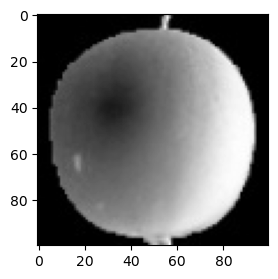

In [72]:
plt.figure(figsize=(3, 3))
plt.imshow(fruits[0], cmap='gray')
plt.show()



- 출력된 이미지가 무엇처럼 보이나요? 첫 번째 행이 위에서 출력한 배열 값에 해당한다.
- 0에 가까울수록 검게 나타나고 높은 값은 밝게 표시된다.

- 보통 흑백 샘플 이미지는 바탕이 밝고 물체가 짙은 색이다. 그런데 왜 이렇게 보일까? 이 흑백 이미지는 사진으로 찍은 이미지를 넘파이 배열로 변환할 때 반전시킨 것이다. 사진의 흰 바탕(높은 값)은 검은색(낮은값)으로 만들고 실제 사과가 있어 짙은 부분(낮은값)은 밝은색(높은값)으로 바꾸었다.
- 왜 이렇게 바꾸었을까? 우리의 관심 대상은 바탕이 아니라 물체이다. 흰색 바탕은 우리에게 중요하지 않지만 컴퓨터는 255에 가까운 바탕에 집중할 것이다. 따라서 바탕을 검게 만들고 사진에 짙게 나온 물체를 밝은 색으로 만들었다.
- 우리가 보는 것과 컴퓨터가 처리하는 방식이 다르기 때문에 종종 흑백 이미지를 이렇게 반전하여 사용한다.
- 관심 대상의 영역을 높은 값으로 바꾸었지만 맷플롯립으로 출력할 때 바탕이 검게 나와 보기에는 좋지 않다. cmap 매개변수를 'gray_r'로 지정하면 다시 반전하여 우리 눈에 보기 좋게 출력한다.

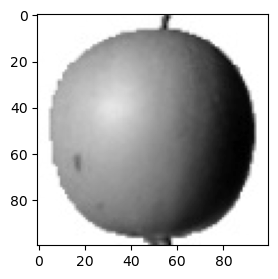

In [76]:
plt.figure(figsize=(3, 3))
plt.imshow(fruits[0], cmap='gray_r')
plt.show()


- 그림에서 밝은 부분이 0에 가깝고 짙은 부분이 255에 가깝다.

- 이 데이터는 사과, 바나나, 파인애플이 각각 100개씩 들어 있다. 바나나와 파인애플 이미지도 출력해보자
- 맷플롯립의 subplots() 함수를 사용하면 여러 개의 그래프를 배열처럼 쌓을 수 있도록 해준다. 1행 2열로 이미지를 출력하기 위해 subplots(1,2)로 지정
- subplots() 함수의 반환값은 2개 : 첫 번째는 그래프를 포함하는 프레임, 두 번째는 각 이미지가 표시될 subplot 을 의미
- 첫 번째 subplot에 파인애플 이미지, 두 번째 subplot에 바나나 이미지 출력

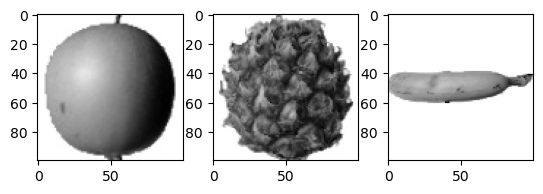

In [146]:
fig, axe = plt.subplots(1, 3)
axe[0].imshow(fruits[0], cmap='gray_r')
axe[1].imshow(fruits[100], cmap='gray_r')
axe[2].imshow(fruits[200], cmap='gray_r')
plt.show()




#### 픽셀값 분석
- fruits 데이터를 사용하기 쉽게 사과, 파인애플, 바나나로 각각 나누어 보자
- 넘파이 배열을 나눌때 100 * 100 이미지를 펼쳐서 길이가 10,000인 1차원 배열로 만들자. 이렇게 펼치면 이미지로 출력하긴 어렵지만 배열을 계산할 때 편리하다.
- 실제로는 어떤 과일이 몇 개가 입력될 지 알 수 없다. 여기서는 예를 들어 확인해보기 위해 만들어진 데이터이다.

In [152]:
apple = fruits[:100].reshape(-1, 100 * 100)
pineapple = fruits[100:200].reshape(-1, 100 * 100)
banana = fruits[200:].reshape(-1, 100 * 100)

- 이렇게 작업하면 과일 각각의 배열의 크기는 (100, 10000)이 된다. 사과를 확인해 보자

In [154]:
apple.shape

(100, 10000)

- 이제 각 배열에 들어있는 샘플의 픽셀 평균값을 계산해 보자
- 넘파이 mean() 함수를 사용한다. 샘플마다 픽셀의 평균값을 계산해야 하므로 mean()함수가 평균을 계산할 축을 지정해야한다. axis=0으로 하면 첫 번째 축인 행을 따라(세로로 픽셀별로) 계산하고 axis=1로 지정하면 두 번째 축인 열을 따라(가로로 샘플별로) 계산한다.
- 우리가 필요한 것은 샘플의 평균값이다. 샘플은 모두 가로로 값을 나열했으니 axis=1로 지정하여 평균을 계산하자.
- 평균을 계산하는 np.mean() 함수를 사용해도 되지만 넘파이 배열은 이런 함수들을 배열의 함수로 제공한다.

In [170]:
print(np.mean(apple, axis=1), end='\n\n')
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   8

- 사과 샘플 100개에 대한 픽셀 평균값을 계산했다. 히스토그램을 그려보면 평균값이 어떻게 분포되어 있는지 한눈에 잘 볼 수 있다.
- 맷플롯립의 hist() 함수를 사용해 히스토그램을 그려보자. 사과, 파인애플, 바나나에 대한 히스토그램을 모두 겹쳐서 그려보자. 겹쳐서 그릴려면 조금 투명하게 그려야 겹친 부분을 잘 볼 수 있다. alpha 매개변수를 1보다 작게 하면 투명도를 줄 수 있다.
- 맷플롯립의 legend() 함수를 사용해 범례도 표시해 보자.

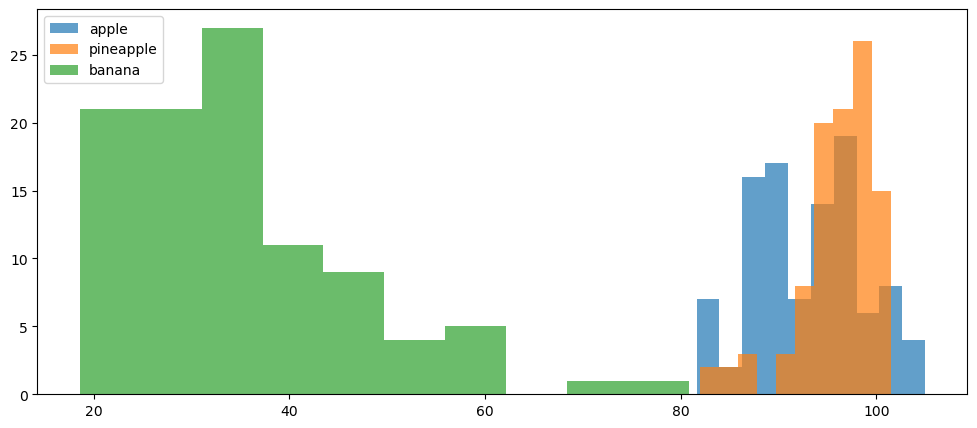

In [235]:
plt.figure(figsize=(12, 5))
plt.hist(apple.mean(axis=1), alpha=0.7, label='apple')
plt.hist(pineapple.mean(axis=1), alpha=0.7, label='pineapple')
plt.hist(banana.mean(axis=1), alpha=0.7, label='banana')
plt.legend()
plt.show()

- 히스토그램을 보면 바나나 사진의 평균값은 40 아래에 집중되어 있고 사과와 파인애플은 90 ~ 100 사이에 많이 모여 있다는 것을 알 수 있다.
- 이 그림을 보면 바나나는 픽셀 평균값만으로 사과나 파인애플과 확실히 구분된다. 바나나는 사진에서 차지하는 영역이 작기 때문에 평균값이 작다.
- 반면 사과와 파인애플은 많이 겹쳐있어서 픽셀값만으로는 구분하기가 쉽지 않다. 사과나 파인애플은 대체로 형태가 동그랗고 사진에서 차지하는 크기도 비슷하기 때문이다.
- 3개 과일을 구분하기 위한 좀 더 나은 방법이 필요하다. 샘플의 평균값이 아니라 픽셀별 평균값을 비교해 보는 것도 좋을 것 같다. 
- 픽셀의 평균을 계산하는 것은 axis=0 으로 지정하면 간단하게 계산할 수 있다.
- 맷플롯립의 bar() 함수를 사용해 픽셀 10,000개에 대한 평균값을 막대그래프로 그려보자.

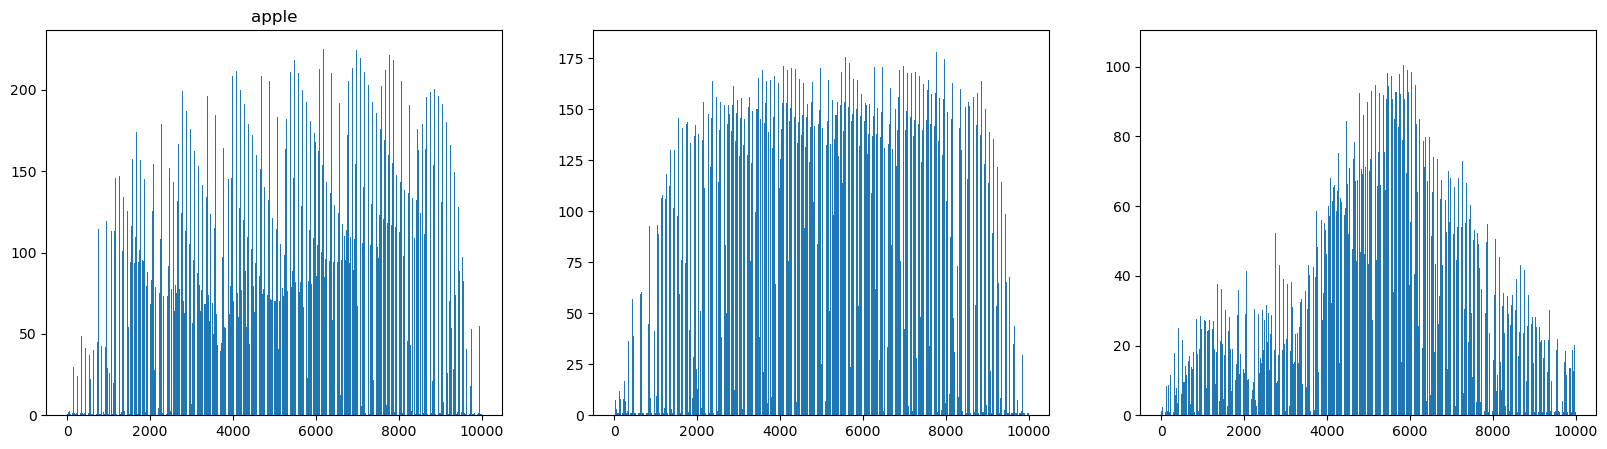

In [253]:
fig, axe = plt.subplots(1, 3, figsize=(20, 5))
axe[0].bar(range(10000), apple.mean(axis=0))
axe[1].bar(range(10000), pineapple.mean(axis=0))
axe[2].bar(range(10000), banana.mean(axis=0))
plt.show()

- 픽셀 평균값을 100 * 100크기로 바꿔서 이미지처럼 출력해서 그래프와 비교
- 픽셀을 평균 낸 이미지를 모든 사진을 합쳐 놓은 대표 이미지로 생각할 수 있다.

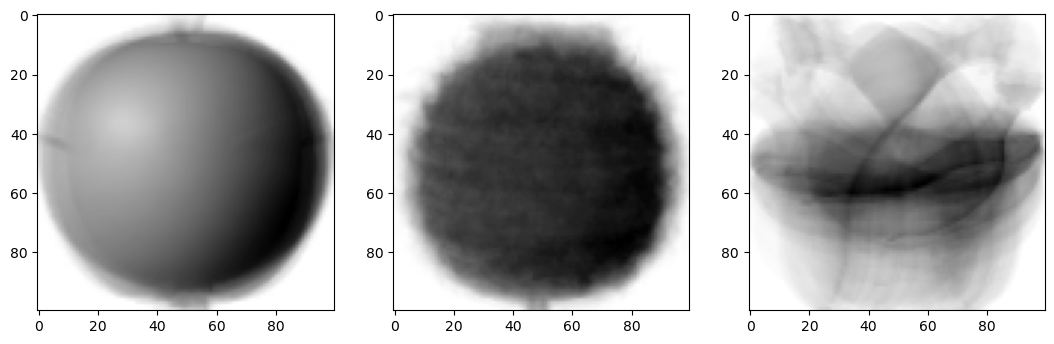

In [295]:
apple_mean = apple.mean(axis=0).reshape(100, 100)
pineapple_mean = pineapple.mean(axis=0).reshape(100, 100)
banana_mean = banana.mean(axis=0).reshape(100, 100)

fig, axe = plt.subplots(1, 3, figsize=(13, 13))
axe[0].imshow(apple_mean, cmap='gray_r')
axe[1].imshow(pineapple_mean, cmap='gray_r')
axe[2].imshow(banana_mean, cmap='gray_r')

plt.show()


- 세 과일은 픽셀 위치에 따라 값의 크기가 차이 난다. 따라서 이 대표 이미지와 가까운 사진을 골라 낸다면 사과, 파인애플, 바나나를 구분할 수 있을 것 같다.

#### 평균과 가까운 사진 고르기
  - 사과 사진의 평균값인 apple_mean과 가장 가까운 사진을 골라보자.
  - 절대값 오차 사용
  - fruits 배열에 있는 모든 샘플에서 apple_mean을 뺀 절대값의 평균을 계산하면 된다.
  - 절대값은 넘파이 abs() 함수 사용

In [285]:
# fruits.shape
fruits.shape

(300, 100, 100)

In [297]:
# apple_mean.shape
apple_mean.shape

(100, 100)

In [316]:

print(abs_diff.shape)

(300, 100, 100)


In [352]:
# fruits에서 apple_mean을 뺀 값의 절대값을 구하고 샘플별 평균을 구해보자

abs_diff = np.abs(fruits - apple_mean)
print(abs_diff.shape)
abs_mean = np.mean(abs_diff, axis=(1, 2))
print(abs_mean.shape)

(300, 100, 100)
(300,)


- 위 코드에서 abs_diff는 (300,100,100) 크기의 배열이다. 따라서 각 샘플에 대한 평균을 구하기 위해 axis에 두 번째, 세 번째 차원을 모두 지정했다. 이렇게 계산한 abs_mean은 각 샘플의 오차 평균이므로 크기가 (300,)인 1차원 배열이다.

- abs_mean의 값이 가장 작은 순서대로 100개를 골라보자. 즉 apple_mean과 오차가 가장 작은 샘플 100개를 고르는 셈이다.
- np.argsort() 함수는 작은 것에서 큰 순서대로 나열한 abs_mean 배열의 인덱스를 반환한다.
- 이 인덱스 중에서 처음 100개를 선택해 10 * 10 격자로 이루어진 그래프를 그려보자.

mean axis=1 ↓ 행방향
mean axis=0 → 열방향

In [370]:
apple_index = np.argsort(abs_mean)[:100] #  인덱스 저장
print(apple_index)

[33 48 70 57 87 12 78 59  1 74 86 38 50 92 69 27 68 30 66 24 76 98 15 84
 47 90  3 94 53 23 14 71 32  7 73 36 55 77 21 10 17 39 99 95 11 35 65  6
 61 22 56 89  2 13 80  0 97  4 58 34 40 43 75 82 54 16 31 49 93 37 63 64
 41 28 67 25 96  8 83 46 19 79 72  5 85 29 20 60 81  9 45 51 88 62 91 26
 52 18 44 42]


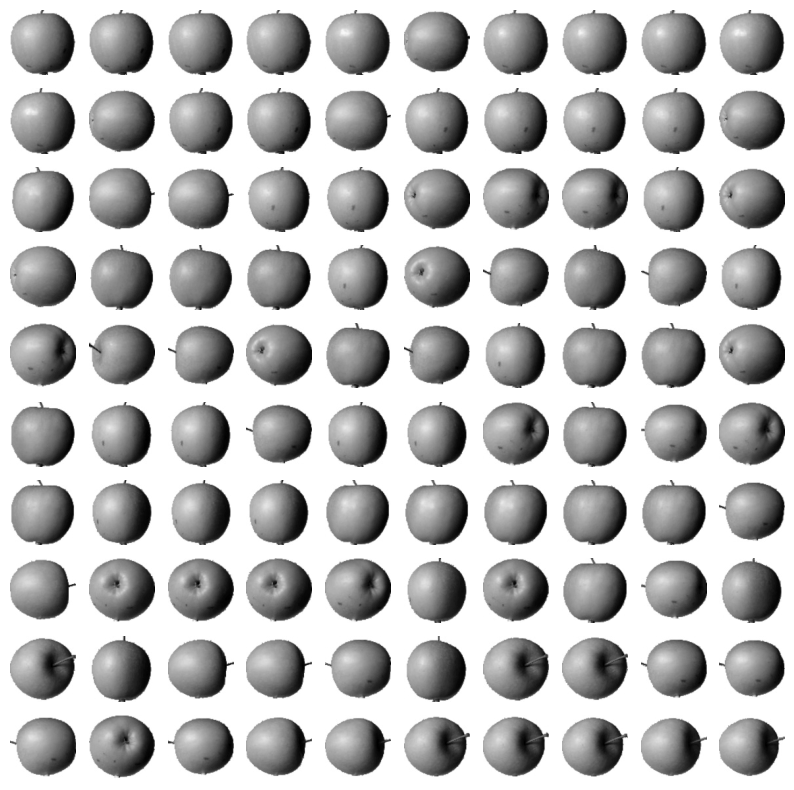

In [386]:
fig, axe = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axe[i][j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axe[i, j].axis('off')


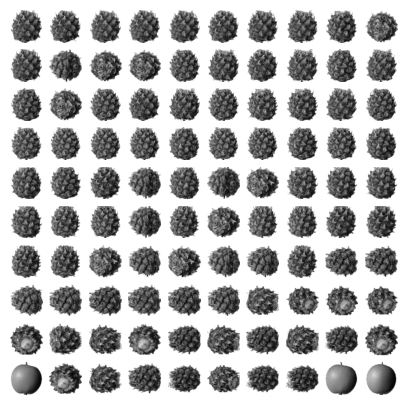

In [394]:
abs_diff2 = np.abs(fruits - pineapple_mean)
abs_mean2 = np.mean(abs_diff2, axis=(1, 2))
pineapple_index = np.argsort(abs_mean2)[:100] #  인덱스 저장

fig, axe = plt.subplots(10, 10, figsize=(5, 5))
for i in range(10):
    for j in range(10):
        axe[i][j].imshow(fruits[pineapple_index[i*10 + j]], cmap='gray_r')
        axe[i, j].axis('off')


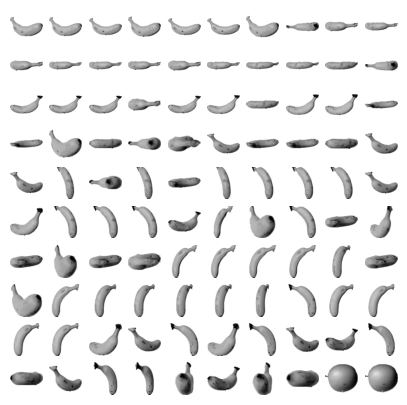

In [396]:
abs_diff3 = np.abs(fruits - banana_mean)
abs_mean3 = np.mean(abs_diff3, axis=(1, 2))
banana_index = np.argsort(abs_mean3)[:100] #  인덱스 저장

fig, axe = plt.subplots(10, 10, figsize=(5, 5))
for i in range(10):
    for j in range(10):
        axe[i][j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axe[i, j].axis('off')


- 흑백 사진에 있는 픽셀값을 사용해 과일 사진을 모으는 작업을 해보았다. 이렇게 비슷한 샘플끼리 그룹으로 모으는 작업을 군집(clustering)이라고 한다. 군집은 대표적인 비지도 학습 작업 중 하나다. 군집 알고리즘에서 만든 그룹을 클러스터라고 한다.
- 하지만 우리는 이미 사과, 파인애플, 바나나가 있다는 것을 알고 있었다. 즉 타깃값을 알고 있었기 때문에 사과, 파인애플, 바나나의 사진 평균값을 계산해서 가장 가까운 과일을 찾을 수 있었다. 실제 비지도 학습에서는 타깃값을 모르기 때문에 이처럼 샘플의 평균값을 미리 구할 수 없다.
- 타깃값을 모르면서 어떻게 세 과일의 평균값을 찾을 수 있을까? K-평균 알고리즘이 이 문제를 해결할 수 있다.